<a href="https://colab.research.google.com/github/jaisal1311/College-Stuff/blob/master/AI/AI_pracs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Inteligence Practicals Journal - 582 (6064)

> Last edited on : 25 October, 2020.

In [ ]:
def myself():
    print(" - Jaisal Shah - 582 😎".rjust(40))

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
from google.colab import data_table
import torch.nn.functional as F
from math import sqrt, inf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---
## Practical 1: Implement Breadth first and Depth First search algorithm.

> ***Artificial Intelligence*** is the study of building agents that act rationally. Most of the time, these agents perform some kind of search algorithm in the background in order to achieve their tasks.<br>
> There are far too many powerful search algorithms out there to fit in a single article. Instead, this article will discuss six of the fundamental search algorithms, divided into two categories, as shown below.<br>
> 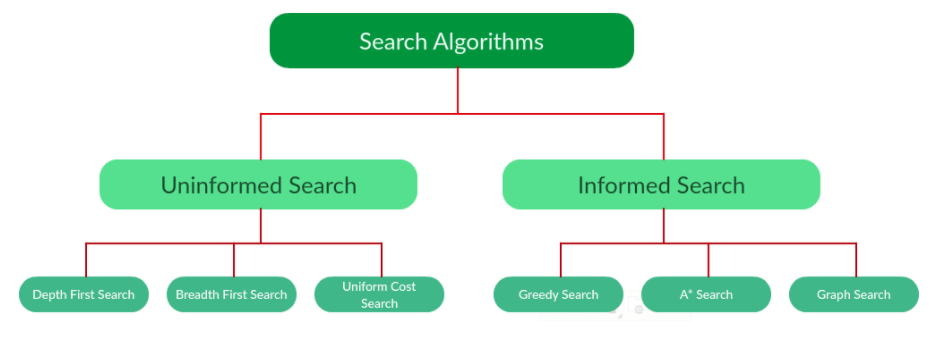


### Romania Map

This is the network data we will be using for search algorithms.

![ROMANIA MAP](https://miro.medium.com/max/863/1*Lx_LKzRCpXnYaEn-ZdUu1Q.png)

In [ ]:
romania_map = {
    'Arad': ['Sibiu', 'Timisoara', 'Zerind'],
    'Bucharest': ['Fagarus', 'Giurgiu', 'Pitesti', 'Urziceni'],
    'Craiova': ['Drobeta', 'Pitesti', 'Rimnicu Vilcea'],
    'Drobeta': ['Craiova', 'Mehadia'],
    'Eforie': ['Hirsova'],
    'Fagarus': ['Bucharest', 'Sibiu'],
    'Giurgiu': ['Bucharest'],
    'Hirsova': ['Eforie', 'Urziceni'],
    'Iasi': ['Neamt', 'Vaslui'],
    'Lugoj': ['Mehadia', 'Timisoara'],
    'Mehadia': ['Drobeta', 'Lugoj'],
    'Neamt': ['Iasi'],
    'Oradea': ['Sibiu', 'Zerind'],
    'Pitesti': ['Bucharest', 'Craiova', 'Rimnicu Vilcea'],
    'Rimnicu Vilcea': ['Craiova', 'Pitesti', 'Sibiu'],
    'Sibiu': ['Oradea', 'Arad','Fagarus', 'Rimnicu Vilcea'],
    'Timisoara':['Arad', 'Lugoj'],
    'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
    'Vaslui': ['Iasi', 'Urziceni'],
    'Zerind': ['Arad', 'Oradea'],
}
myself()

                   - Jaisal Shah - 582 😎


### Breadth First Search Algorithm

> ***Breadth-first search (BFS)*** is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root (or some arbitrary node of a graph, sometimes referred to as a ‘search key’), and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

### BFS traversal until node is found

In [ ]:
def BFS_traversal(G, s, d):
    if s == d:
        return 'Masti Nai...😅'
    visited = [s]
    q = [s]
    while q:
        u = q.pop(0)
        for v in G[u]:
            if v not in visited:
                if v == d:
                    visited.append(v)
                    return ' => '.join(visited)
                else:
                    q.append(v)
                    visited.append(v)
    return 'Not Found..😞'

print(BFS_traversal(romania_map, 'Arad', 'Bucharest'))
myself()

Arad => Sibiu => Timisoara => Zerind => Oradea => Fagarus => Rimnicu Vilcea => Lugoj => Bucharest
                   - Jaisal Shah - 582 😎


### BFS Shortest Path

In [ ]:
def BFS_shortest_path(G, source, destination):
    visited= []
    queue = [[source]]

    if source == destination:
        return 'No masti..😅'
    
    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node not in visited:
            neighbours = G[node]
        
        for neighbour in neighbours:
            new_path = list(path)
            new_path.append(neighbour)
            queue.append(new_path)

            if neighbour == destination:
                return (' => '.join(new_path), '✨')
        visited.append(node)
    return 'Not Found..😞'
print(BFS_shortest_path(romania_map, 'Arad', 'Bucharest'))
myself()

('Arad => Sibiu => Fagarus => Bucharest', '✨')
                   - Jaisal Shah - 582 😎


### Depth First Search

> ***Depth-first search (DFS)*** is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

In [ ]:
def DFS(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex])
    return visited

print(DFS(romania_map, 'Craiova'))
myself()

{'Vaslui', 'Eforie', 'Pitesti', 'Oradea', 'Rimnicu Vilcea', 'Hirsova', 'Craiova', 'Giurgiu', 'Iasi', 'Timisoara', 'Urziceni', 'Mehadia', 'Lugoj', 'Neamt', 'Arad', 'Fagarus', 'Zerind', 'Drobeta', 'Bucharest', 'Sibiu'}
                   - Jaisal Shah - 582 😎


### Iterative Deepening Search

> Iterative deepening search (or iterative-deepening depth-first search) offers a solution for the problem of finding the best depth limit. It gradually increases the depth — first 0, then 1, then 2, and so on — until a goal is found. It combines the advantages of both BFS and DFS. Like DFS, it consumes less memory: O(bd). Like BFS, it is complete when b is finite, and is optimal when the path cost is a non-decreasing function of depth.


In [ ]:
class Graph:

    def __init__(self, vertices):
        self.graph = {}
        for i in range(vertices):
            self.graph[i] = []

    def add_edge(self, x, y):
        self.graph[x].append(y)

    def depth_limited_search(self, start, value, max_depth): 
        print("Current node:", start)
        if start == value:
            print("Found value:", value)
            return True
        elif max_depth < 0:
            return False

        for node in self.graph[start]: 
            if self.depth_limited_search(node, value, max_depth - 1):
                return True
        return False


    ''' Iterative Deepening Search '''
    def iterative_deepening_search(self, value, max_depth):
        for level in range(max_depth): 
            if self.depth_limited_search(0, value, level): 
                return True
        return False

g = Graph(8)                #8 vertices
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)
g.add_edge(3, 6)
g.add_edge(5, 7)
print("Graph:", g.graph)
myself()

Graph: {0: [1, 2], 1: [3, 4], 2: [5], 3: [6], 4: [], 5: [7], 6: [], 7: []}
                   - Jaisal Shah - 582 😎


In [ ]:
value = 4
max_depth = 3
g.iterative_deepening_search(value, max_depth)
myself()

Current node: 0
Current node: 1
Current node: 2
Current node: 0
Current node: 1
Current node: 3
Current node: 4
Found value: 4
                   - Jaisal Shah - 582 😎


---
## Practical 2: Heuristic Based Search

### A * Algorithm

> *  **A*  (pronounced as "A star")*** is a computer algorithm that is widely used in pathfinding and graph traversal. The algorithm efficiently plots a walkable path between multiple nodes, or points, on the graph.
* A non-efficient way to find a path  
* On a map with many obstacles, pathfinding from points AA to BB can be difficult. A robot, for instance, without getting much other direction, will continue until it encounters an obstacle, as in the path-finding example to the left below.
* However, the A* algorithm introduces a heuristic into a regular graph-searching algorithm, essentially planning ahead at each step so a more optimal decision is made. With A*, a robot would instead find a path in a way similar to the diagram on the right below.
* A* is an extension of Dijkstra's algorithm with some characteristics of breadth-first search (BFS).

> The equation $f(n) = g(n) + h(n)$ guides the algorithm at selecting the optimum node at choosing a path.

In [ ]:
import pandas as pd
from math import sqrt
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
map = {
    "Name":{
        "0":"Arad","1":"Bucharest","2":"Craiova",
        "3":"Drobeta","4":"Eforie","5":"Fagaras",
        "6":"Giurgiu","7":"Hirsova","8":"Iasi",
        "9":"Lugoj","10":"Mehadia","11":"Neamt",
        "12":"Oradea","13":"Pitesti","14":"Rimnicu Vilcea",
        "15":"Sibiu","16":"Timisoara","17":"Urziceni",
        "18":"Vaslui","19":"Zerind"
        },
     "X":{
         "0":62,"1":560,"2":319,"3":177,"4":824,"5":409,"6":518,
          "7":777,"8":680,"9":175,"10":182,"11":571,"12":121,"13":434,
          "14":290,"15":244,"16":67,"17":649,"18":735,"19":86
          },
     "Y":{"0":144,"1":409,"2":478,"3":463,"4":469,"5":217,"6":507,
          "7":378,"8":122,"9":333,"10":394,"11":73,"12":19,"13":353,
          "14":281,"15":202,"16":282,"17":376,"18":222,"19":83
          }
     }

print('THE COORDINATES')
myself()

THE COORDINATES
                   - Jaisal Shah - 582 😎


In [ ]:
distances = {
    "A":{
        "0":"Arad","1":"Arad","2":"Arad","3":"Bucharest","4":"Bucharest","5":"Craiova",
        "6":"Craiova","7":"Drobeta","8":"Fagaras","9":"Hirsova","10":"Iasi","11":"Lugoj",
        "12":"Mehadia","13":"Oradea","14":"Timisoara","15":"Pitesti","16":"Rimnicu Vilcea",
        "17":"Sibiu","18":"Sibiu","19":"Urziceni","20":"Urziceni","21":"Vaslui","22":"Zerind",
        "23":"Zerind","24":"Timisoara","25":"Sibiu","26":"Giurgiu","27":"Urziceni","28":"Rimnicu Vilcea",
        "29":"Pitesti","30":"Craiova","31":"Bucharest","32":"Eforie","33":"Neamt","34":"Mehadia","35":"Drobeta",
        "36":"Sibiu","37":"Lugoj","38":"Bucharest","39":"Pitesti","40":"Fagaras",
        "41":"Rimnicu Vilcea","42":"Vaslui","43":"Hirsova","44":"Iasi","45":"Oradea"},
    "B":{
        "0":"Zerind","1":"Timisoara","2":"Sibiu","3":"Giurgiu","4":"Urziceni","5":"Rimnicu Vilcea",
        "6":"Pitesti","7":"Craiova","8":"Bucharest","9":"Eforie","10":"Neamt","11":"Mehadia","12":"Drobeta",
        "13":"Sibiu","14":"Lugoj","15":"Bucharest","16":"Pitesti","17":"Fagaras","18":"Rimnicu Vilcea","19":"Vaslui",
        "20":"Hirsova","21":"Iasi","22":"Oradea","23":"Arad","24":"Arad","25":"Arad","26":"Bucharest",
        "27":"Bucharest","28":"Craiova","29":"Craiova","30":"Drobeta","31":"Fagaras","32":"Hirsova","33":"Iasi",
        "34":"Lugoj","35":"Mehadia","36":"Oradea","37":"Timisoara","38":"Pitesti","39":"Rimnicu Vilcea","40":"Sibiu",
        "41":"Sibiu","42":"Urziceni","43":"Urziceni","44":"Vaslui","45":"Zerind"},
    "Distance":{
        "0":75,"1":118,"2":140,"3":90,"4":85,"5":146,"6":138,"7":120,"8":211,"9":86,"10":87,"11":70,"12":75,"13":151,
        "14":111,"15":101,"16":97,"17":99,"18":80,"19":142,"20":98,"21":92,"22":71,"23":75,"24":118,"25":140,"26":90,
        "27":85,"28":146,"29":138,"30":120,"31":211,"32":86,"33":87,"34":70,"35":75,"36":151,"37":111,"38":101,"39":97,
        "40":99,"41":80,"42":142,"43":98,"44":92,"45":71
        }
      }

print('POINT TO POINT DISTANCE')
myself()

POINT TO POINT DISTANCE
                   - Jaisal Shah - 582 😎


In [ ]:
places_coord = pd.DataFrame.from_dict(map)
distance_route = pd.DataFrame.from_dict(distances)
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
def heuristic(node, dest):
  if node == dest:
    return 0
  else:
    x_dist = (places_coord.loc[places_coord['Name'] == node].X.item() - places_coord.loc[places_coord['Name'] == dest].X.item()) ** 2
    y_dist = (places_coord.loc[places_coord['Name'] == node].Y.item() - places_coord.loc[places_coord['Name'] == dest].Y.item()) ** 2 
    return int(sqrt(x_dist + y_dist))

def curr_forw(curr_node, final_dest):
  h = [] # heruistic added with curr_node to next_spot dist
  pl = [] # names of all places
  global distances
  if curr_node == final_dest:
    return curr_node, 0
  places = distance_route.loc[distance_route['A'] == curr_node] # returns rows. Basically of all the paths connected from current node.
  print('Current Node: ', curr_node)
  for place in places.itertuples():
    if place.B not in closed_list:
      pl.append(place.B)
      print(place.B, ' || edge: ', place.Distance, ' ; weight so far: ', distances, ' ; heuristic:  ', heuristic(place.B, final_dest))
      h.append(distances + place.Distance + heuristic(place.B, final_dest)) # weights added but path not optimal
  print('\n')
  next_spot = pl[h.index(min(h))]
  # distances += places.loc[places['B'] == next_spot].Distance.item()
  return next_spot, places.loc[places['B'] == next_spot].Distance.item()


def a_star(source, dest):
  global distances
  if source == dest:
    return dest
  open_list.append(source)
  while len(open_list) > 0:
    n, h_val = curr_forw(open_list[0], dest)
    if n == dest:
      distances += h_val
      s = open_list.pop(0)
      closed_list.append(s)
      closed_list.append(dest)
      return closed_list
    distances += h_val
    s = open_list.pop(0)
    open_list.append(n)
    closed_list.append(s)
  return closed_list


open_list = []
closed_list = []
distances = 0 # weights summed till curr-1 node from source
print(a_star('Arad', 'Neamt'))
print('\n')

# the path isnt optimal as the heuristic underestimates the admissibility based on the given coordinates, and that might be the actual issue
# else the algorithm works, and the code remains correct
myself()

Current Node:  Arad
Zerind  || edge:  75  ; weight so far:  0  ; heuristic:   485
Timisoara  || edge:  118  ; weight so far:  0  ; heuristic:   545
Sibiu  || edge:  140  ; weight so far:  0  ; heuristic:   351


Current Node:  Sibiu
Fagaras  || edge:  99  ; weight so far:  140  ; heuristic:   216
Rimnicu Vilcea  || edge:  80  ; weight so far:  140  ; heuristic:   349
Oradea  || edge:  151  ; weight so far:  140  ; heuristic:   453


Current Node:  Fagaras
Bucharest  || edge:  211  ; weight so far:  239  ; heuristic:   336


Current Node:  Bucharest
Giurgiu  || edge:  90  ; weight so far:  450  ; heuristic:   437
Urziceni  || edge:  85  ; weight so far:  450  ; heuristic:   312
Pitesti  || edge:  101  ; weight so far:  450  ; heuristic:   311


Current Node:  Urziceni
Vaslui  || edge:  142  ; weight so far:  535  ; heuristic:   221
Hirsova  || edge:  98  ; weight so far:  535  ; heuristic:   368


Current Node:  Vaslui
Iasi  || edge:  92  ; weight so far:  677  ; heuristic:   119


Curr

## Practical 3: Implementation of Neural Net on IRIS dataset

**Neural Network**
> A ***Neural Network*** is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

**IRIS Dataset**
> * This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
* The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
* The below plot uses the first two features. See here for more information on this dataset.

### IRIS

Loading the dataset

In [ ]:
iris = pd.read_csv('/content/iris_csv.csv')
iris.head()
myself()

                   - Jaisal Shah - 582 😎


Initilaizing and compiling the model

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression 
X, y = load_iris(return_X_y=True) 
clf = LogisticRegression(random_state=0).fit(X, y) 
clf.score(X, y) 
myself()

                   - Jaisal Shah - 582 😎


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Preddicting (testing) the model

In [ ]:
# At position 39, the correct label is 0.
clf.predict(X)[39]
myself()

                   - Jaisal Shah - 582 😎


### EDA (Exploratory Data Analysis) of IRIS Dataset

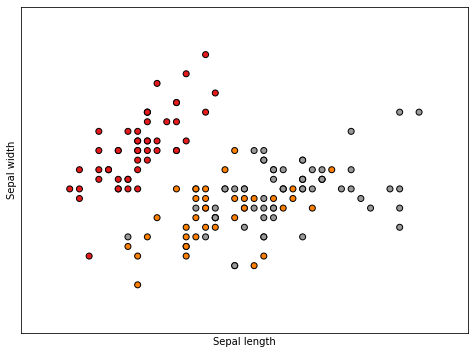

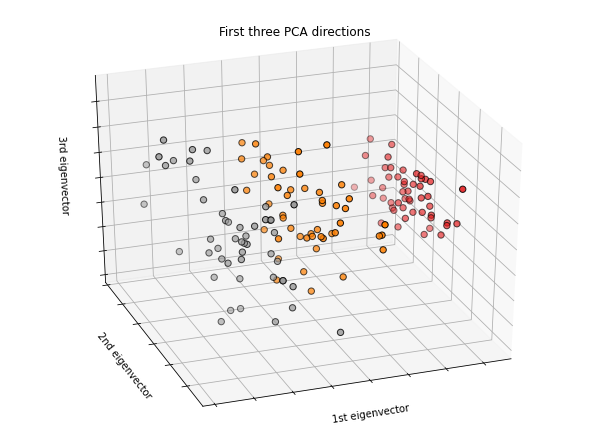

                   - Jaisal Shah - 582 😎


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
myself()

## Practical 4: Implementation of basic neural network model with 4 activation functions on Pima Indians onset of diabetes dataset.

**Activation Function**
> In Artificial Neural Networks, the ***Activation Function*** of a node defines the output of that node given an input or set of inputs. A standard integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input.

**Types of Activation Function**

ReLU
> The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 

Tanh
> tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).

Leaky ReLU
> Leaky ReLUs are one attempt to fix the “dying ReLU” problem. Instead of the function being zero when x < 0, a leaky ReLU will instead have a small negative slope (of 0.01, or so).

Sigmoid Function
> A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point. A sigmoid "function" and a sigmoid "curve" refer to the same object.

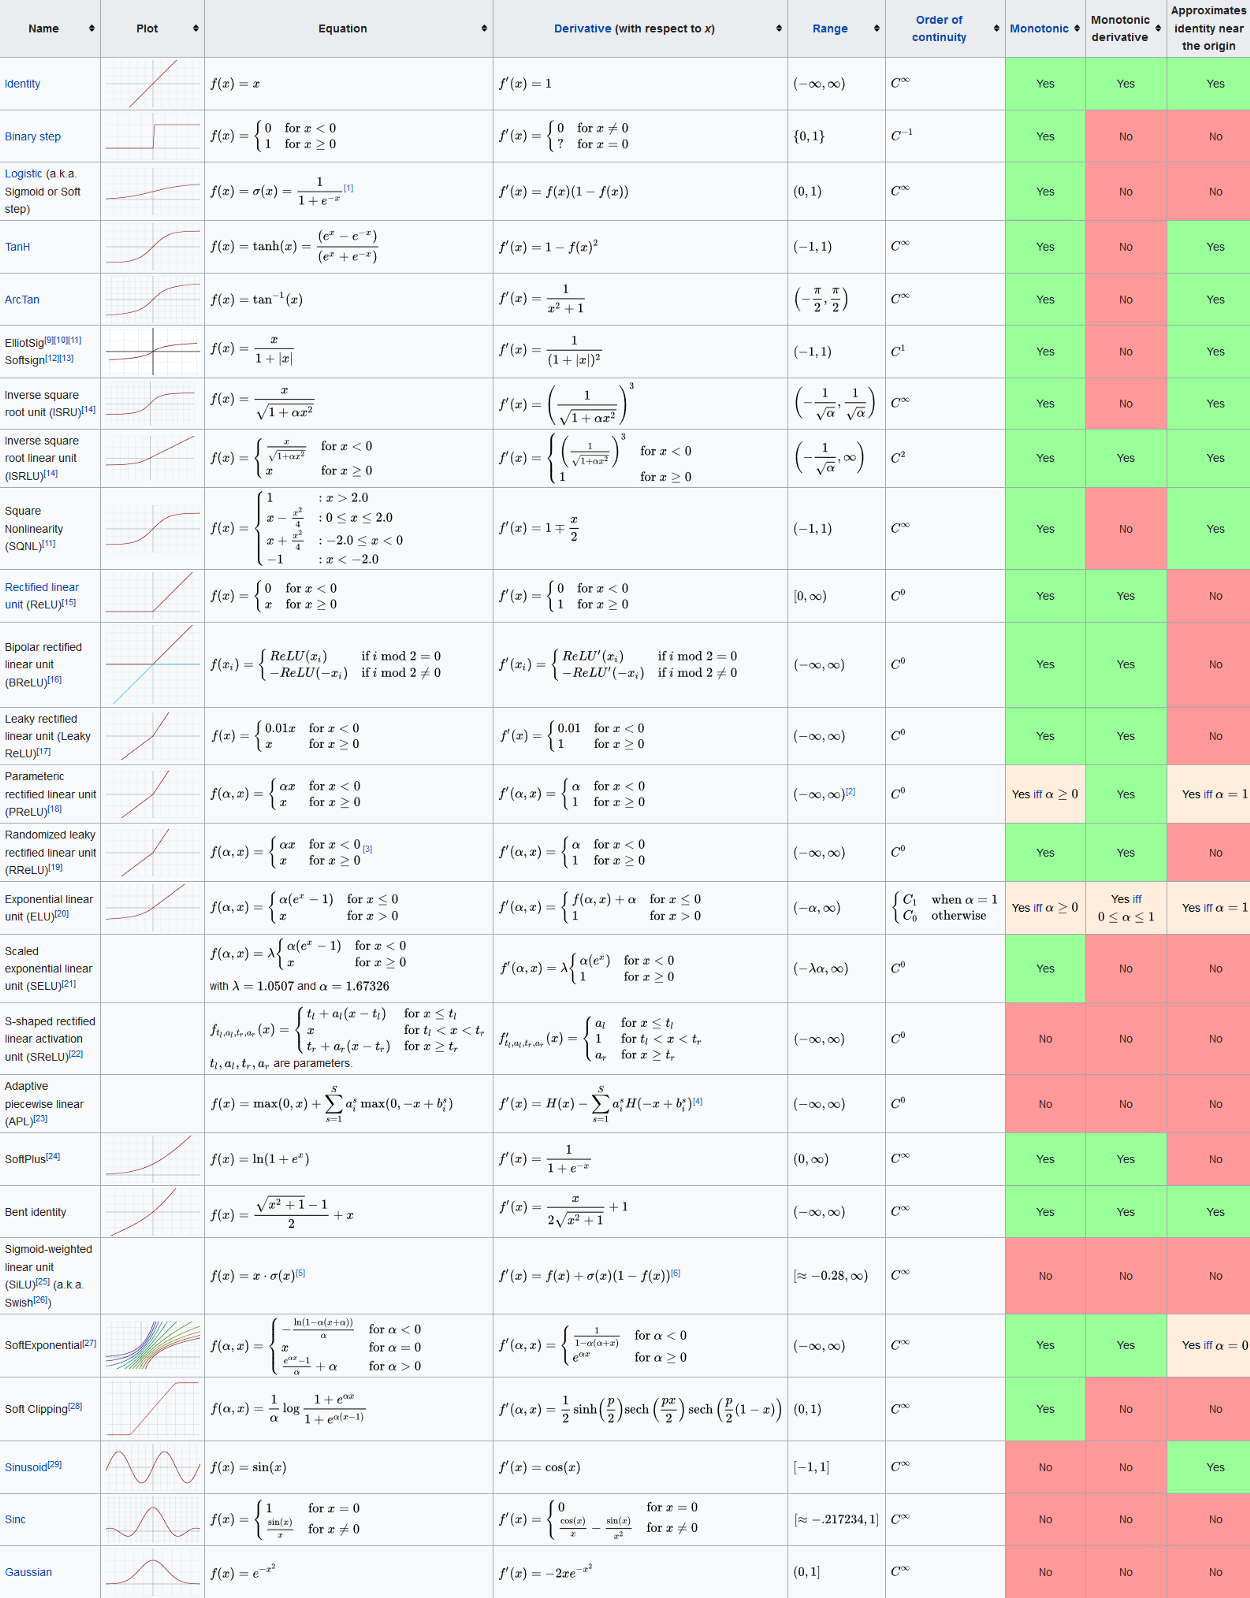

Importing necessary libraries

In [ ]:
import numpy as np
data = pd.read_csv('/content/diabetes.csv')
data 
myself()

                   - Jaisal Shah - 582 😎


Initializing primary tensors

In [ ]:
inputs = torch.from_numpy(np.array(data.iloc[:, :-1])).float()
outputs = torch.from_numpy(np.array(data.iloc[:, -1])).float()

outputs.unique()
myself()

                   - Jaisal Shah - 582 😎


Modelling the Neural Network

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(8, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 32),
    torch.nn.Tanh(),
    torch.nn.Linear(32, 16),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(16, 8),
    torch.nn.Sigmoid(),
    torch.nn.Linear(8, 1),
    torch.nn.Sigmoid(),
)
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
loss_fn = F.binary_cross_entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.00005)
myself()

                   - Jaisal Shah - 582 😎


Training the Model

In [ ]:
model.train()
loss_record = []
e = []
for t in range(1000):

    Y_pred = model(inputs)

    loss = loss_fn(Y_pred, outputs.unsqueeze(1))
    
    if t % 100 == 0:
        print("Epoch:", t, "\tLoss:", loss.item())
        loss_record.append(loss.item())
        e.append(t)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
myself()

Epoch: 0 	Loss: 0.8408420085906982
Epoch: 100 	Loss: 0.8393130302429199
Epoch: 200 	Loss: 0.8377954959869385
Epoch: 300 	Loss: 0.8362895846366882
Epoch: 400 	Loss: 0.8347951769828796
Epoch: 500 	Loss: 0.8333120346069336
Epoch: 600 	Loss: 0.8318402171134949
Epoch: 700 	Loss: 0.8303797841072083
Epoch: 800 	Loss: 0.8289307951927185
Epoch: 900 	Loss: 0.827492892742157
                   - Jaisal Shah - 582 😎


Testing and Predicting the model

In [ ]:
print(torch.round(model(inputs[99])))
print(outputs[99])
myself()

tensor([1.], grad_fn=<RoundBackward>)
tensor(1.)
                   - Jaisal Shah - 582 😎


## Practical 5: Performing AND & OR Gate Operations in the Neural Network

Basic common Imports

### OR

> The ***OR*** gate is an electronic circuit that gives a high output (1) if one or more of its inputs are high. A plus (+) is used to show the OR operation. 

In [ ]:
# values
or_ing = {'x1': [0,0,1,1], 'x2': [0,1,0,1], 'y': [0, 1, 1, 1]}

df = pd.DataFrame.from_dict(or_ing)

inputs = torch.from_numpy(np.array(df[['x1', 'x2']])).float()
targets = torch.from_numpy(np.array(df[['y']])).float()
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
# Define model
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
print(model.parameters)
myself()

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)>
                   - Jaisal Shah - 582 😎


In [ ]:
# Loss Function
loss_fn = F.mse_loss
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
# Optimizer
opt = torch.optim.SGD(model.parameters(), lr=0.0001)
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        # Train with batches of data
        for xb,yb in train_dl:
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()

        # epoch_hist.append(epoch)

        # Print the progress
        if (epoch+1) % 25 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            yield epoch+1, loss.item()
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
batch_size = 1
train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size, shuffle=True); 
history = []
history += fit(200, model, loss_fn, opt, train_dl)
myself()

Epoch [25/200], Loss: 0.2592
Epoch [50/200], Loss: 0.3008
Epoch [75/200], Loss: 0.2997
Epoch [100/200], Loss: 0.2602
Epoch [125/200], Loss: 0.2976
Epoch [150/200], Loss: 0.2609
Epoch [175/200], Loss: 0.2954
Epoch [200/200], Loss: 0.2943
                   - Jaisal Shah - 582 😎


In [ ]:
preds = model(inputs)
preds = torch.round(preds)
print(preds)
e_h, l_h = [], []
for i in history:
  e_h.append(i[0])
  l_h.append(i[1])

myself()

tensor([[1.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward>)
                   - Jaisal Shah - 582 😎


### AND

> The AND gate is a basic digital logic gate that implements logical conjunction - it behaves according to the truth table to the right. A HIGH output (1) results only if all the inputs to the AND gate are HIGH (1). If none or not all inputs to the AND gate are HIGH, LOW output results.

In [ ]:
# values
and_ing = {'x1': [0,0,1,1], 'x2': [0,1,0,1], 'y': [0, 0, 0, 1]}

df = pd.DataFrame.from_dict(or_ing)

inputs = torch.from_numpy(np.array(df[['x1', 'x2']])).float()
targets = torch.from_numpy(np.array(df[['y']])).float()
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
    )
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        # Train with batches of data
        for xb,yb in train_dl:
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()

        # epoch_hist.append(epoch)

        # Print the progress
        if (epoch+1) % 25 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            yield epoch+1, loss.item()
myself()            

                   - Jaisal Shah - 582 😎


In [ ]:
batch_size = 1
train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size, shuffle=True); 
history = []
history += fit(200, model, loss_fn, opt, train_dl)
myself()

Epoch [25/200], Loss: 0.3954
Epoch [50/200], Loss: 0.1153
Epoch [75/200], Loss: 0.1153
Epoch [100/200], Loss: 0.1021
Epoch [125/200], Loss: 0.1021
Epoch [150/200], Loss: 0.1540
Epoch [175/200], Loss: 0.1540
Epoch [200/200], Loss: 0.3954
                   - Jaisal Shah - 582 😎


In [ ]:
preds = model(inputs)
preds = torch.round(preds)
print(preds)
e_h, l_h = [], []
for i in history:
  e_h.append(i[0])
  l_h.append(i[1])
myself()    

tensor([[1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward>)
                   - Jaisal Shah - 582 😎


## Practical 6: Prediction Algorithm - Use of different packages on dataset of Cat and Non-Cat images.

For practical list, please follow the link given below.
[Cats Vs Non-Cats ON Andrew Ng;s Dataset](https://colab.research.google.com/drive/1B7pul9R73ccbqyY3kZB_ZRMgMwNsp-vk?usp=sharing/). This link redirects to the spcific notebook of Practical 6.

Extra Reads:
[Cats Vs DOgs with 97.5% Accuracy!](https://github.com/jaisal1311/Deep-Learning/tree/master/Computer%20Vision/Cats%F0%9F%90%B1%20Vs%20Dogs%20%F0%9F%90%B6(97%20%25))
The link redirects to my GitHub page, where I've pushed Cats Vs DOgs i.e. Cats and Non-Cats Project.


## Practical 7: Simple Linear Regression

> In statistics, ***simple linear regression*** is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. The adjective simple refers to the fact that the outcome variable is related to a single predictor.

> The equation below is used to evalute simple linear regression.

** y = α + βx ** 

where,
     α  is the intercept,
     β  is the slope, and
     x,y  are the independent and dependent variables respectively.

### Implementing Simple Linear Regression on Salary Dataset

By implementing this, our model will be capable of predicting a person's salary on basis of his/her years of experience.

Defining Dataset

In [ ]:
salary_dataset = [['YearsExperience','Salary'],
[1.1,39343.00],
[1.3,46205.00],
[1.5,37731.00],
[2.0,43525.00],
[2.2,39891.00],
[2.9,56642.00],
[3.0,60150.00],
[3.2,54445.00],
[3.2,64445.00],
[3.7,57189.00],
[3.9,63218.00],
[4.0,55794.00],
[4.0,56957.00],
[4.1,57081.00],
[4.5,61111.00],
[4.9,67938.00],
[5.1,66029.00],
[5.3,83088.00],
[5.9,81363.00],
[6.0,93940.00],
[6.8,91738.00],
[7.1,98273.00],
[7.9,101302.00],
[8.2,113812.00],
[8.7,109431.00],
[9.0,105582.00],
[9.5,116969.00],
[9.6,112635.00],
[10.3,122391.00],
[10.5,121872.00]]
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
df = pd.DataFrame(salary_dataset)
df.head()
myself()

                   - Jaisal Shah - 582 😎


Defining model params

In [ ]:
X = df.iloc[1:, :-1].values
y = df.iloc[1:,1].values
myself()

                   - Jaisal Shah - 582 😎


Initializing the model

In [ ]:
# Spitting test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Initializing Regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
myself()

                   - Jaisal Shah - 582 😎


Predicting the results

In [ ]:
y_pred = regressor.predict(X_test)
myself()

                   - Jaisal Shah - 582 😎


Plotting the accuracies

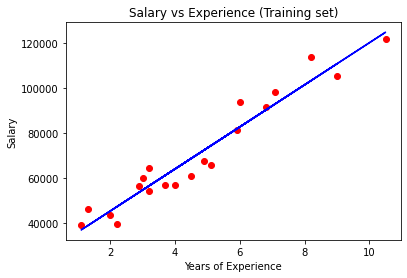

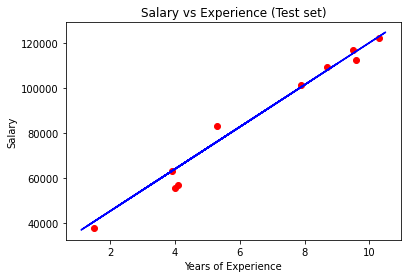

                   - Jaisal Shah - 582 😎


In [ ]:
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Step 6 - Visualize test set results
# import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
myself()

Predicting from new value


In [ ]:
# prediction from  new value
new_salary_pred = regressor.predict([[15]])
print(new_salary_pred)
myself()

[167005.32889087]
                   - Jaisal Shah - 582 😎


## Practical 8: Implement Support Vector Algorithm

**Support Vector Machine**
> A ***Support Vector Machine (SVM)*** is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.<br>
A support vector machine is also known as a support vector network (SVN).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
#Define the col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
#Encoding the categorical column
dataset = dataset.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

#Visualize the new dataset
dataset.head()
myself()

                   - Jaisal Shah - 582 😎


                   - Jaisal Shah - 582 😎


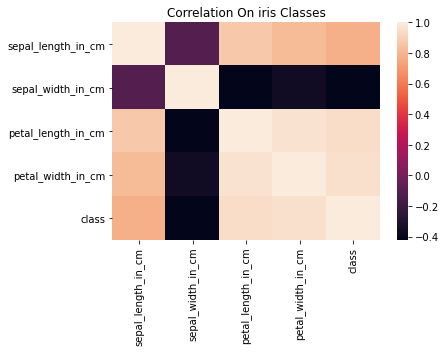

In [ ]:
plt.figure(1)
import seaborn as sns
sns.heatmap(dataset.corr())
plt.title('Correlation On iris Classes')
myself()

In [ ]:
# Splitting the dataset into training and testing

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)
myself()

                   - Jaisal Shah - 582 😎


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, \
                             cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
myself()

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %
                   - Jaisal Shah - 582 😎


## Practical 9: Implement decision tree learning algorithm .

**Deecision Tree Algorithm

> A decision tree is a graphical representation of specific decision situations that are used when complex branching occurs in a structured decision process. A decision tree is a predictive model based on a branching series of Boolean tests that use specific facts to make more generalized conclusions.


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
myself()

                   - Jaisal Shah - 582 😎


Using matplotlib backend: agg
                   - Jaisal Shah - 582 😎


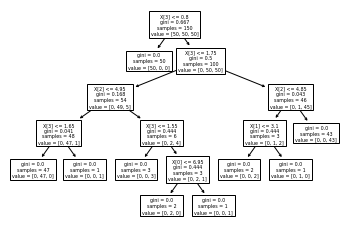

In [ ]:
%matplotlib
x = tree.plot_tree(clf) 
myself()

## Thank You!! 🙌